In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [12]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/Diwali_Sales.csv',encoding="latin-1") # encoding = unicode_escape

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
df.shape

(11251, 15)

In [22]:
df = df.drop(['Status','unnamed1'], axis = 1)

In [24]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [29]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [27]:
df.dropna(subset = 'Amount', inplace = True)

In [31]:
# now the data has not null values

In [32]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
# Changing dtypes

In [43]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [42]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [41]:
df['Amount'] = df['Amount'].astype('int')

## Exploratory Data Analysis

Q1: What is the distribution of customers across different age groups? Are there any age groups that are particularly well-represented or under-represented?

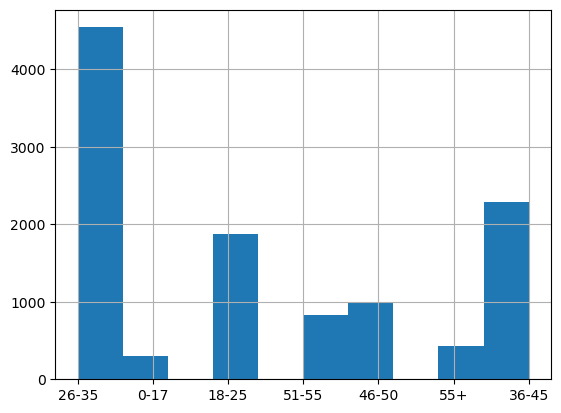

In [47]:
df['Age Group'].hist()
plt.show()

Ans: Age Group 26-35 are well represented and 0-17 are under represented

Q2: What percentage of customers are male and female?

In [70]:
male_count = df[df['Gender'] == 'M'].shape[0]
female_count = df[df['Gender'] == 'F'].shape[0]
total_count = df.shape[0]

In [78]:
print('the percentage of male customers: ',(male_count / total_count) * 100)
print('the percentage of female customers: ',(female_count / total_count) * 100)

the percentage of male customers:  30.314084882996706
the percentage of female customers:  69.68591511700329


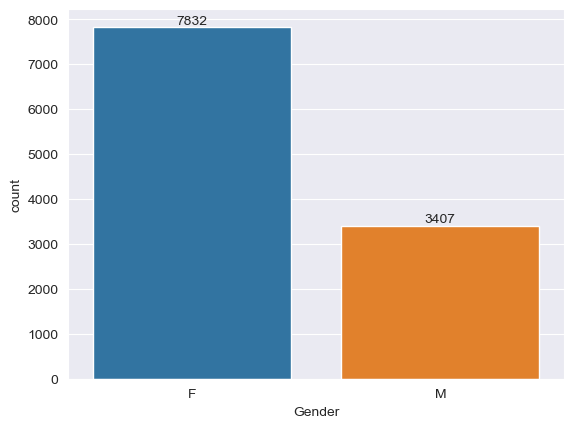

In [203]:
ax = sns.countplot(data = df, x = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [207]:
df.groupby('Gender')['Amount'].sum()

Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

Ans: As we can see there are high number of female customers compared to males

Q3: Is there a relationship between a customer's age and their marital status?

In [103]:
df['Age'].corr(df['Marital_Status'])

-0.012344229223588011

Ans: A correlation coefficient is very close to 0, indicating that there is almost no linear relationship between Age and Marital Status. This means that changes in one variable do not predict changes in the other variable.

Q4: In which states do the most customers reside?

In [116]:
top_5_states = df['State'].value_counts().head(5).reset_index()

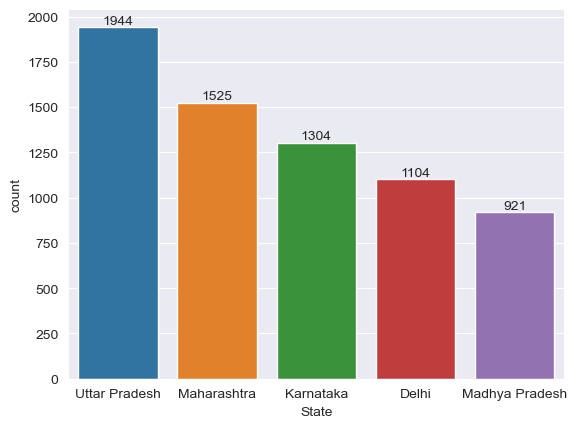

In [208]:
ax = sns.barplot(data = top_5_states, x = 'State', y = 'count')
sns.set_style('darkgrid')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()
plt.show()

Q5: Is there a correlation between a customer's location and their profession? 

In [142]:
from scipy.stats import chi2_contingency

In [144]:
table = pd.crosstab(df['Occupation'],df['State'])

In [145]:
table

State,Andhra Pradesh,Bihar,Delhi,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Punjab,Rajasthan,Telangana,Uttar Pradesh,Uttarakhand
Occupation,,,,,,,,,,,,,,,,
Agriculture,19,10,37,12,12,17,7,39,11,22,29,3,4,1,52,8
Automobile,39,19,47,21,28,31,24,63,21,42,82,11,15,12,94,16
Aviation,99,37,131,65,55,53,43,153,57,102,190,24,22,11,241,27
Banking,82,38,108,35,51,64,50,138,50,81,166,24,22,13,197,18
Chemical,38,25,57,20,17,27,22,66,18,43,71,8,8,4,100,17
Construction,24,18,39,15,17,28,17,45,19,29,52,12,7,4,78,10
Food Processing,28,16,36,24,16,27,23,47,20,39,46,4,16,5,65,11
Govt,70,21,97,29,25,48,36,94,39,89,110,19,19,7,124,27
Healthcare,114,59,131,48,60,80,38,155,58,116,198,25,24,17,248,37


In [146]:
result_test = chi2_contingency(table)

In [150]:
print('statistical test: ',result_test[0])
print('p value: ', result_test[1])

statistical test:  244.12834003949223
p value:  0.05316727343459076


Ans: the p-value is well below 5%, so we can reject the hypothesis that the two variables being tested are independent.

Q6: What is the average order amount for a customer? Are there any high spenders or low spenders?

In [155]:
df['Amount'].mean().round(2)

9453.61

In [151]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


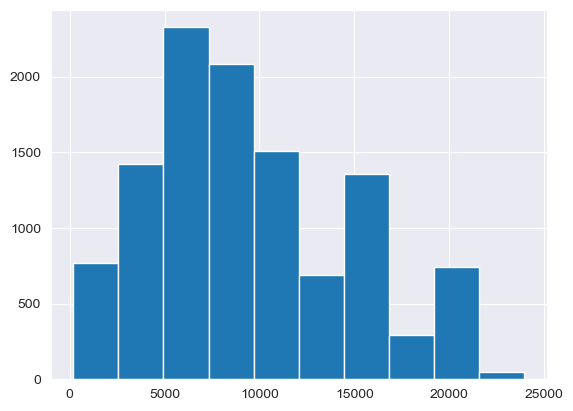

In [157]:
df['Amount'].hist()
plt.show()

As we can see there are 5000 - 10000 more spenders

Q7: What product categories are the most popular among customers?

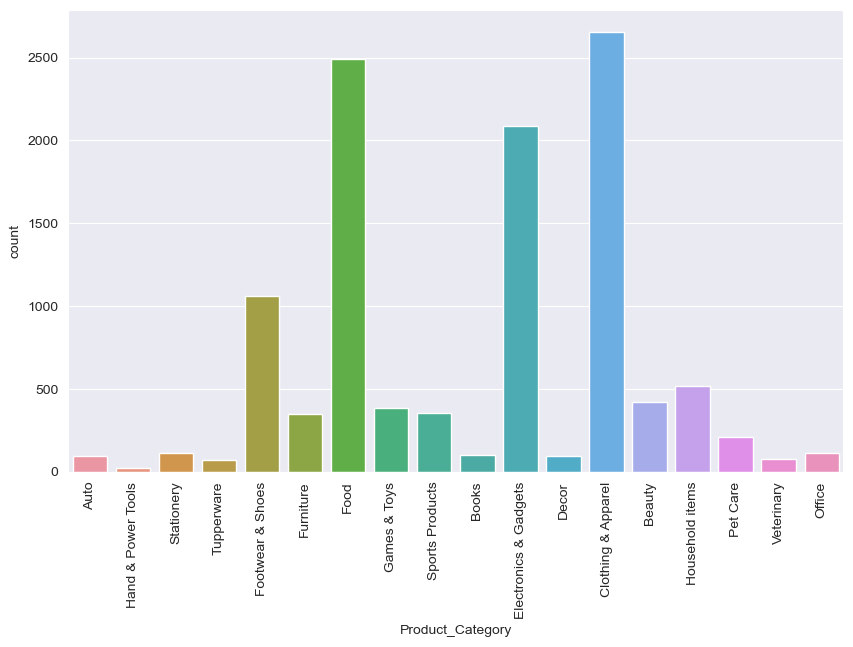

In [180]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Product_Category')
plt.xticks(rotation = 90)
plt.show()

As we can see above plot Clothing & Apparel Product Category are the most popular among customers 

Q8: What Age group mostly order

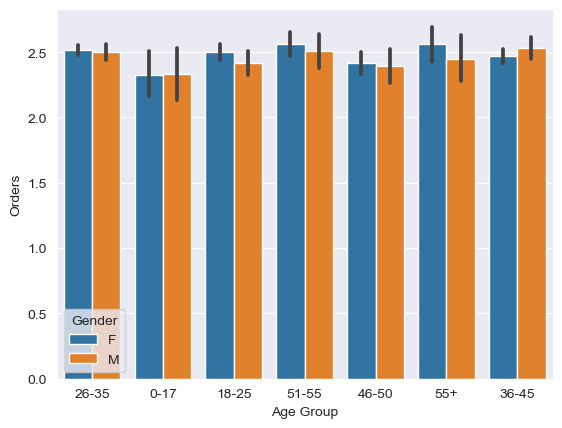

In [210]:
ax = sns.barplot(data = df, x = 'Age Group',y = 'Orders', hue = 'Gender')
plt.show()

Q9: count customers on the basis of marital_status

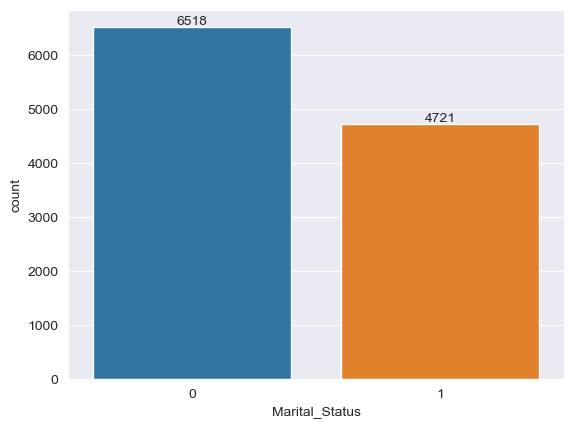

In [222]:
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)    
plt.show()

Q10: What is the most occupations occured of customers in data

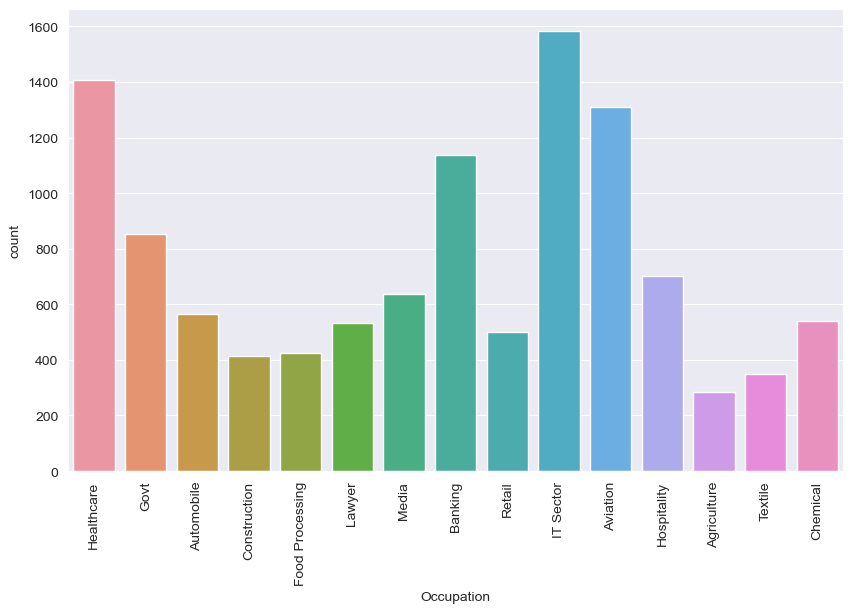

In [230]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Occupation')
plt.xticks(rotation = 90)
plt.show()

Ans: Customers from It sector ordered most of the time